# Cajamar Challenge: Exploratory Analysis

Author: Florent Micand

In [81]:
import pandas as pd
from pandas import to_datetime
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [82]:
df = pd.read_csv('train2.txt', sep = '|')
df.sort_values('ID_Customer',ascending = True).head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0


### 1. Data Consistency Checks

###### Null values

In [83]:
pd.isnull(df).sum()

ID_Customer      0
Cod_Prod         0
Cod_Fecha        0
Socio_Demo_01    0
Socio_Demo_02    0
Socio_Demo_03    0
Socio_Demo_04    0
Socio_Demo_05    0
dtype: int64

###### Duplicated values

In [84]:
np.any(df.duplicated().values)

False

###### Socio-demographic values

Each row correspond to a purchase done by a specific user in a specific time. Most of the users have purchased several products, so we check that the socio-demographic values are always the same for the users.

In [85]:
numCustomers = df.ID_Customer.nunique()
for demographic in df.columns.values[3:]:
    print demographic+": "+str(numCustomers - df.groupby('ID_Customer')[demographic].nunique().sum())

Socio_Demo_01: 0
Socio_Demo_02: 0
Socio_Demo_03: 0
Socio_Demo_04: 0
Socio_Demo_05: 0


### 2. Exploratory Analysis

###### Global Numbers

In [86]:
print "Number of entries: ",df.shape[0]
print "Number of classes: ",df.shape[1]
print ""
print "Number of distinct values for each class:"

for col in df.columns.values:
    print col+": "+str(df[col].nunique())

Number of entries:  3350601
Number of classes:  8

Number of distinct values for each class:
ID_Customer: 676370
Cod_Prod: 94
Cod_Fecha: 635
Socio_Demo_01: 5
Socio_Demo_02: 5
Socio_Demo_03: 5
Socio_Demo_04: 2
Socio_Demo_05: 4


###### Number of customers per product

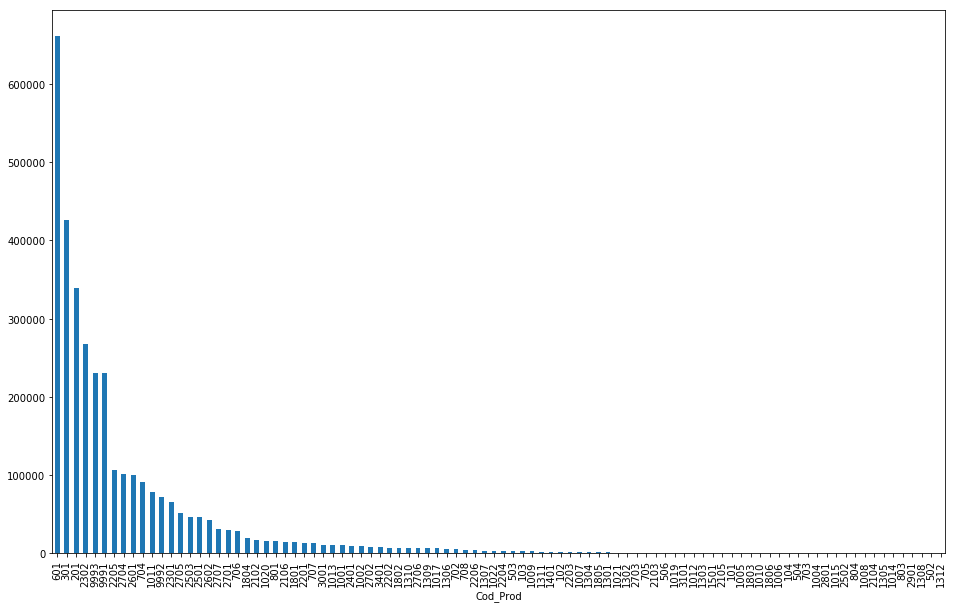

In [87]:
ProdDistrib = df.groupby('Cod_Prod').ID_Customer.nunique()
fig = plt.figure(figsize=(16,10))
ProdDistrib.sort_values(ascending=False).plot(kind='bar')

In [88]:
# Half of the transactions are from the first 4 most sold products.
suma = ProdDistrib.sort_values(ascending=False).values.sum()
((ProdDistrib.sort_values(ascending=False).values).astype(float)*100/suma)[:4].sum()

50.61112916757321

###### Number of products per customer

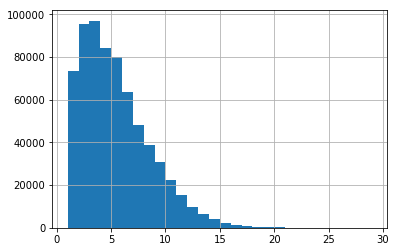

In [90]:
df.groupby('ID_Customer').Cod_Prod.count().hist(bins=28)

In [91]:
print "Max number of products per client:", max(df.groupby('ID_Customer').Cod_Prod.count())
print "Min number of products per client:", min(df.groupby('ID_Customer').Cod_Prod.count())
print "Average number of products per client:", np.mean(df.groupby('ID_Customer').Cod_Prod.count())

Max number of products per client: 29
Min number of products per client: 1
Average number of products per client: 4.95379895619


###### Sociodemographic distributions

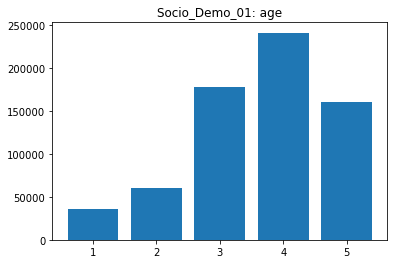

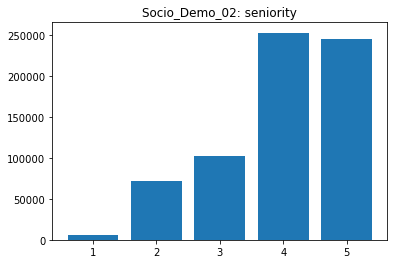

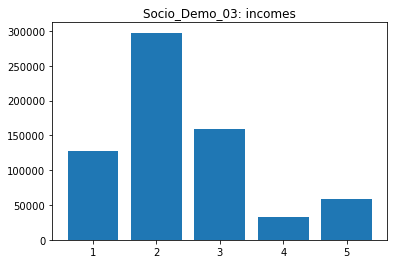

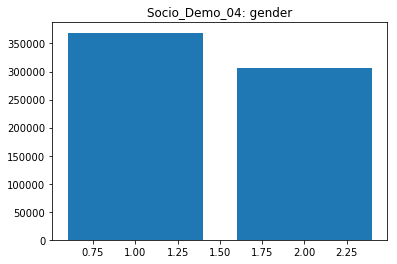

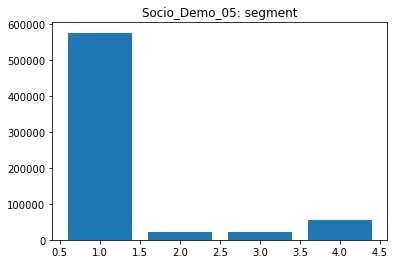

In [92]:
meaningful_labels = ["age", "seniority", "incomes", "gender", "segment"]
n= 0
for demographic in df.columns.values[3:]:
    x = range(1,df[demographic].nunique()+1)
    y = df.groupby(demographic).ID_Customer.nunique()
    plt.title(demographic+": "+meaningful_labels[n])
    n = n+1
    plot = plt.bar(x,y)
    plt.show()

###### Sociodemographic relationships

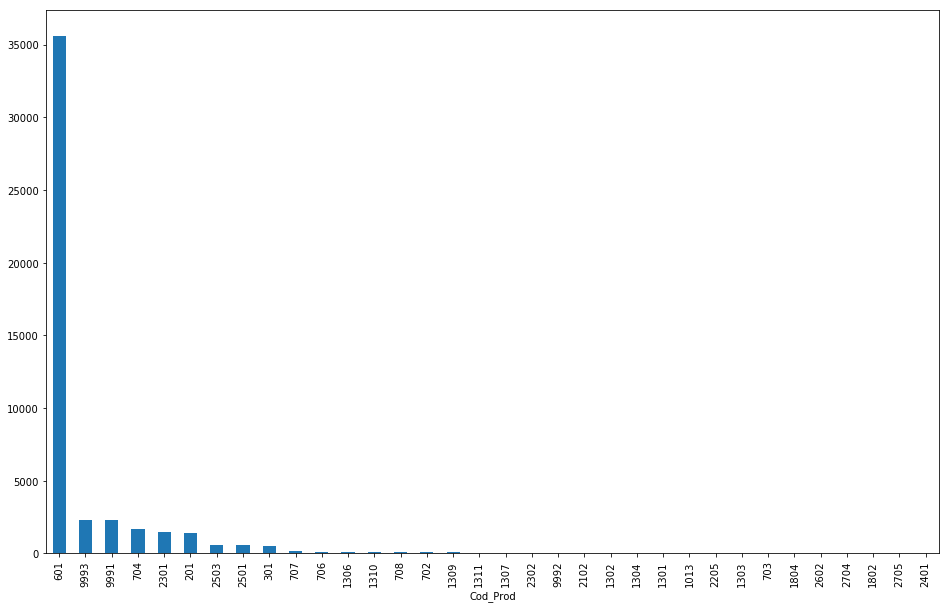

In [93]:
# Youngest customers
ProdDistrib = df[df["Socio_Demo_01"] == 1].groupby('Cod_Prod').ID_Customer.nunique()
fig = plt.figure(figsize=(16,10))
ProdDistrib.sort_values(ascending=False).plot(kind='bar')

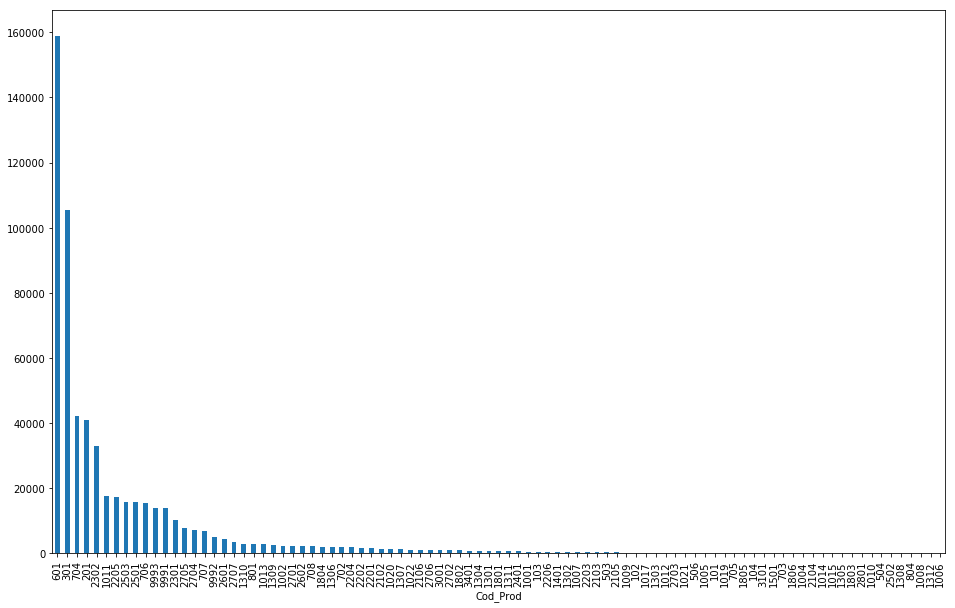

In [94]:
# Oldest customers
ProdDistrib = df[df["Socio_Demo_01"] == 5].groupby('Cod_Prod').ID_Customer.nunique()
fig = plt.figure(figsize=(16,10))
ProdDistrib.sort_values(ascending=False).plot(kind='bar')

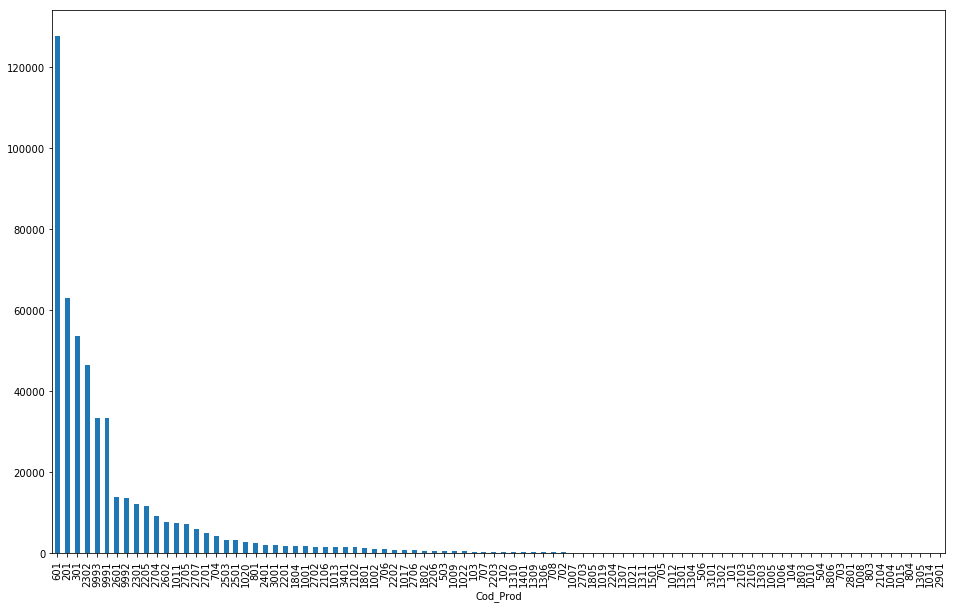

In [95]:
# Customers with less incomes
ProdDistrib = df[df["Socio_Demo_03"] == 1].groupby('Cod_Prod').ID_Customer.nunique()
fig = plt.figure(figsize=(16,10))
ProdDistrib.sort_values(ascending=False).plot(kind='bar')

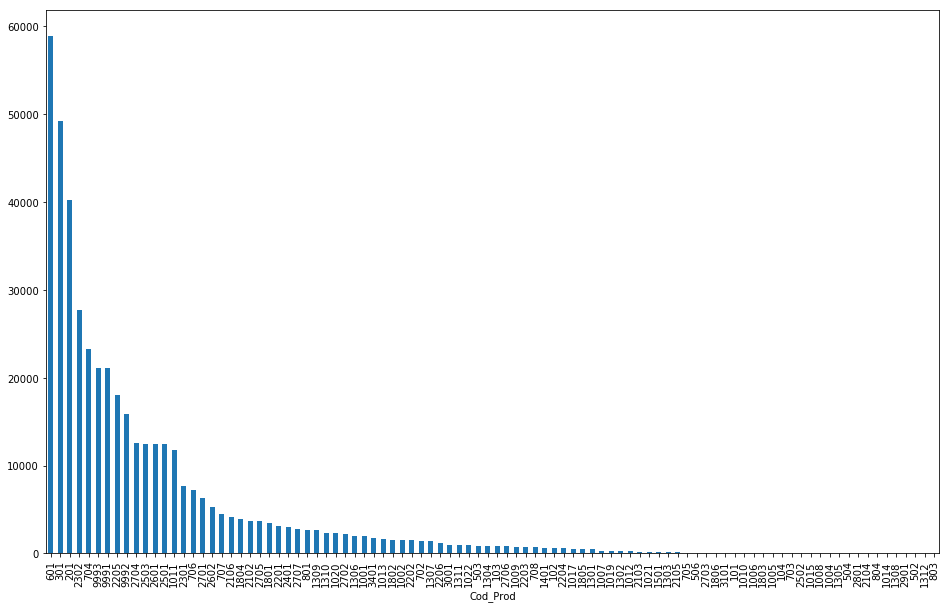

In [96]:
# Customers with more incomes
ProdDistrib = df[df["Socio_Demo_03"] == 5].groupby('Cod_Prod').ID_Customer.nunique()
fig = plt.figure(figsize=(16,10))
ProdDistrib.sort_values(ascending=False).plot(kind='bar')

### 3. Temporality

Let's check if some purchases are influencied by temporality for the top products.

In [97]:
# Creating Year and Month series
df["Cod_Month"] = to_datetime(df["Cod_Fecha"],format='%Y-%m').dt.month
df["Cod_Year"] = to_datetime(df["Cod_Fecha"],format='%Y-%m').dt.year
df.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Cod_Month,Cod_Year
0,A0000001,601,2007-05,5,4,3,1,0,5,2007
1,A0000001,704,2013-04,5,4,3,1,0,4,2013
2,A0000001,2501,2006-03,5,4,3,1,0,3,2006
3,A0000001,2503,2006-03,5,4,3,1,0,3,2006
4,A0000001,1011,2011-04,5,4,3,1,0,4,2011


###### Monthly Distribution

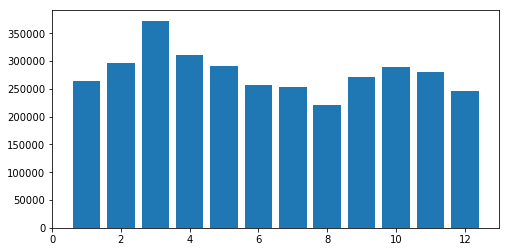

In [98]:
plt.rcParams["figure.figsize"] = (8,4)
data = df.groupby("Cod_Month").ID_Customer.agg(['count'])
plot = plt.bar(data.index,data.values)

###### Yearly distribution

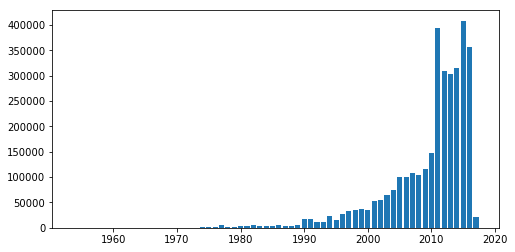

In [99]:
plt.rcParams["figure.figsize"] = (8,4)
data = df.groupby("Cod_Year").ID_Customer.agg(['count'])
plot = plt.bar(data.index,data.values)

###### Top products' monthly distribution

In [100]:
def top_dist(Cod):
    ProdDistrib = df.groupby('Cod_Prod').ID_Customer.nunique()
    top5 = ProdDistrib.sort_values(ascending=False).head(5).index
    n=0
    f, axarr = plt.subplots(5, sharex=True)
    for product in top5:
        serie = df[df["Cod_Prod"] == [product]].groupby(Cod).Cod_Month.count()
        axarr[n].bar(serie.index,serie.values)
        axarr[n].set_title(product)
        n=n+1
    plt.rcParams["figure.figsize"] = (10,20)
    plt.show()

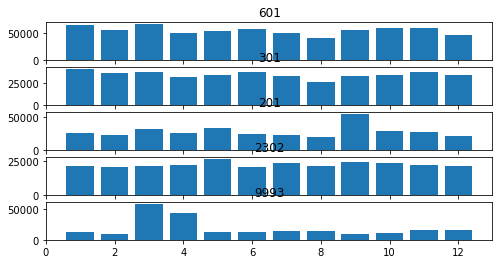

In [101]:
top_dist("Cod_Month")

###### Top products' yearly distribution

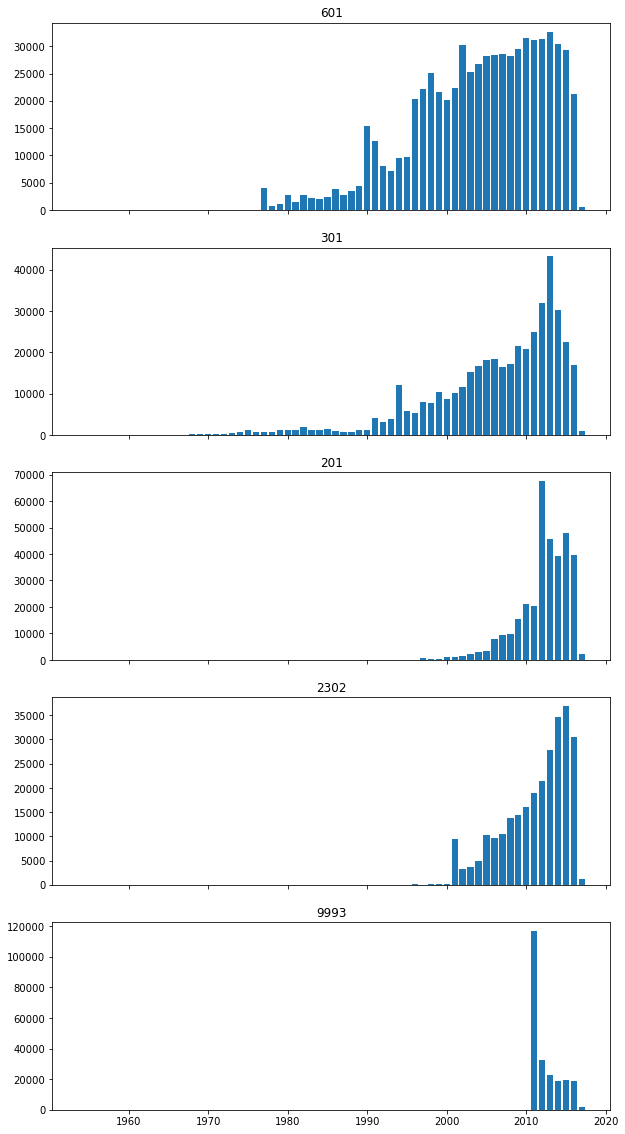

In [102]:
top_dist("Cod_Year")

### 4. Products not purchased recently

In [103]:
def products_no_purchased_recently(df,_days):

    # Most recent purchase date
    maxi = to_datetime(max(df["Cod_Fecha"]),format='%Y-%m')
    # Establishing a limit: _days from most recent purchase date
    limit = maxi - timedelta(days=_days)
    # We keep the most recent purchased for each product
    products_date=df.sort_values(by=["Cod_Prod", "Cod_Fecha"], ascending=[True,False])
    products_newest_date=products_date.drop_duplicates("Cod_Prod")
    # We check if those purchases were done before the limit
    products_no_purchased_recently = products_newest_date[to_datetime(products_newest_date["Cod_Fecha"],format='%Y-%m')<limit]["Cod_Prod"].values
    print "Number of products not purchased in the last "+str(_days)+" days: "+str(len(products_no_purchased_recently))
    print products_no_purchased_recently

products_no_purchased_recently(df,730)
products_no_purchased_recently(df,365)

Number of products not purchased in the last 730 days: 14
[ 104  504  702  703  705 1004 1007 1015 1312 1803 1806 2502 2801 3101]
Number of products not purchased in the last 365 days: 18
[ 104  502  504  702  703  705 1004 1007 1014 1015 1305 1312 1803 1806 2502
 2703 2801 3101]
